<a href="https://colab.research.google.com/github/M-hoseinpour/machine-learning/blob/master/CNN/fashion_mnist(TF%2Ckeras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape : ", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape :  (60000, 28, 28)


In [3]:
# convolution expects height * width * color
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("number of classes : ", K)

number of classes :  10


In [7]:
model = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, (3, 3), strides=2, activation='relu'),
    Conv2D(64, (3, 3), strides=2, activation='relu'),
    Conv2D(128, (3, 3), strides=2, activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(K, activation='softmax')
])

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
res = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5295 - accuracy: 0.8054 - val_loss: 0.4025 - val_accuracy: 0.8507
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3680 - accuracy: 0.8612 - val_loss: 0.3664 - val_accuracy: 0.8607
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3198 - accuracy: 0.8810 - val_loss: 0.3357 - val_accuracy: 0.8718
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2871 - accuracy: 0.8911 - val_loss: 0.3277 - val_accuracy: 0.8753
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2590 - accuracy: 0.9021 - val_loss: 0.3088 - val_accuracy: 0.8865
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2389 - accuracy: 0.9097 - val_loss: 0.2869 - val_accuracy: 0.8944
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2208 - accuracy: 0.9164 - val_loss: 0.3019 -

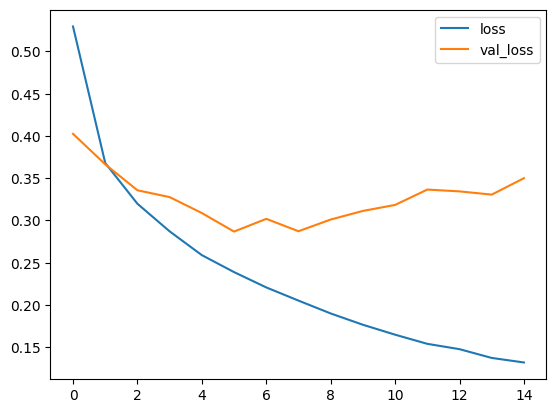

In [11]:
plt.plot(res.history["loss"], label="loss")
plt.plot(res.history["val_loss"], label="val_loss")
plt.legend()

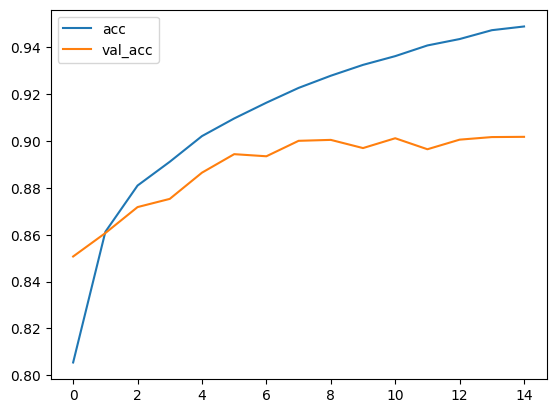

In [12]:
plt.plot(res.history["accuracy"], label="acc")
plt.plot(res.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[884   0  21  17   2   1  70   0   4   1]
 [  2 968   2  15   5   0   7   0   1   0]
 [ 22   0 861   9  50   0  57   0   1   0]
 [ 22   2  15 888  44   1  25   0   3   0]
 [  1   0  61  14 869   0  54   0   1   0]
 [  0   0   0   1   0 974   0  17   0   8]
 [138   0  57  26  94   0 674   0  11   0]
 [  0   0   0   0   0  16   0 951   2  31]
 [  0   2   6   1   4   2   6   2 976   1]
 [  1   0   0   0   0   4   0  22   0 973]]


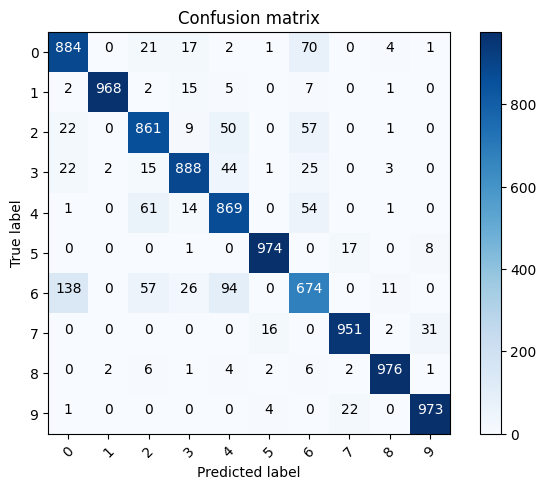

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: Trouser Predicted: T-shirt/top')

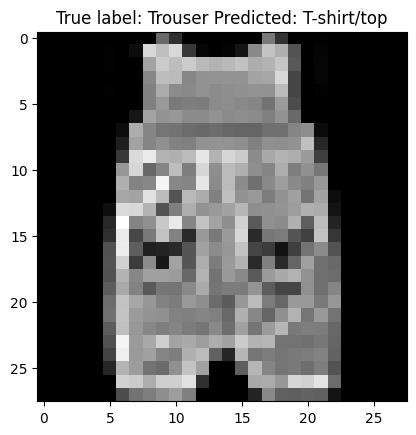

In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))